In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv('road_accident.csv', low_memory=False)
df = pd.DataFrame(data)

In [111]:
category_columns = [colname for colname in df.select_dtypes(["object", "category"])]
len(category_columns)

22

In [112]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 659707, Number of columns: 26


In [113]:
df.describe(include='object')

,Index,Accident_Severity,Time,Day_of_week,Accident Date,Light_Conditions,District Area,Road_Surface_Conditions,Road_Type,Types_of_Junction,...,Weather_Conditions,Vehicle_Type,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Pedestrian_movement,Owner_of_vehicle,Cause_of_accident
count,659707,659707,659707,659707,659707,659707,659707,659707,659707,11429,...,659707,659707,12316,12316,11575,11737,11487,659707,11834,12316
unique,420220,3,1074,7,1461,5,422,5,5,8,...,9,16,5,3,7,4,7,9,4,20
top,2.01E+12,Slight,15:30:00,Saturday,11/30/2019,Daylight,Birmingham,Dry,Single carriageway,Y Shape,...,Fine no high winds,Car,18-30,Male,Junior high school,Employee,5-10yr,Not a Pedestrian,Owner,No distancing
freq,239306,562993,6408,107005,701,484181,13489,447674,495999,4543,...,520611,497252,4271,11437,7619,9627,3363,610104,10459,2263


In [114]:
df = df.drop_duplicates(subset=['Index'], keep='first')

In [115]:
df.describe(include='object')

,Index,Accident_Severity,Time,Day_of_week,Accident Date,Light_Conditions,District Area,Road_Surface_Conditions,Road_Type,Types_of_Junction,...,Weather_Conditions,Vehicle_Type,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Pedestrian_movement,Owner_of_vehicle,Cause_of_accident
count,420220,420220,420220,420220,420220,420220,420220,420220,420220,11429,...,420220,420220,12316,12316,11575,11737,11487,420220,11834,12316
unique,420220,3,1074,7,1461,5,289,5,5,8,...,9,15,5,3,7,4,7,9,4,20
top,201091NM02142,Slight,15:30:00,Saturday,11/30/2019,Daylight,Birmingham,Dry,Single carriageway,Y Shape,...,Fine no high winds,Car,18-30,Male,Junior high school,Employee,5-10yr,Not a Pedestrian,Owner,No distancing
freq,1,359775,4127,67980,450,306518,13489,287330,316046,4543,...,332593,315649,4271,11437,7619,9627,3363,388687,10459,2263


In [116]:
df.head(5)

,Index,Accident_Severity,Time,Day_of_week,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,...,Weather_Conditions,Vehicle_Type,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Pedestrian_movement,Owner_of_vehicle,Cause_of_accident
0,200701BS64157,Serious,17:02:00,Wednesday,6/5/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,...,Fine no high winds,Car,18-30,Male,Above high school,Employee,1-2yr,Not a Pedestrian,Owner,Moving Backward
1,200701BS65737,Serious,17:02:00,Tuesday,7/2/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,...,Raining no high winds,Car,31-50,Male,Junior high school,Employee,Above 10yr,Not a Pedestrian,Owner,Overtaking
2,200701BS66127,Serious,17:02:00,Monday,8/26/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,...,Unknown,Taxi/Private hire car,18-30,Male,Junior high school,Employee,1-2yr,Not a Pedestrian,Owner,Changing lane to the left
3,200701BS66128,Serious,1:06:00,Friday,8/16/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,...,Fine no high winds,Bus or coach (17 or more pass seats),18-30,Male,Junior high school,Employee,5-10yr,Not a Pedestrian,Governmental,Changing lane to the right
4,200701BS66837,Slight,1:06:00,Tuesday,9/3/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,...,Unknown,Other vehicle,18-30,Male,Junior high school,Employee,2-5yr,Not a Pedestrian,Owner,Overtaking


In [117]:
missing_values = df.isnull().sum()
missing_values

Index                           0
Accident_Severity               0
Time                            0
Day_of_week                     0
Accident Date                   0
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Types_of_Junction          408791
Urban_or_Rural_Area             0
Type_of_collision          408059
Weather_Conditions              0
Vehicle_Type                    0
Age_band_of_driver         407904
Sex_of_driver              407904
Educational_level          408645
Vehicle_driver_relation    408483
Driving_experience         408733
Pedestrian_movement             0
Owner_of_vehicle           408386
Cause_of_accident          407904
dtype: int64

In [118]:
def fill_with_random(series):

    non_null_values = series.dropna()
    
    if series.isnull().any() and len(non_null_values) > 0:
        random_values = np.random.choice(non_null_values, size=series.isnull().sum())
        series.loc[series.isnull()] = random_values
    return series

num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col] = fill_with_random(df[col])

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = fill_with_random(df[col])

missing_values_after = df.isnull().sum()
print("القيم الفارغة بعد المعالجة:")
print(missing_values_after)

C:\Users\asmaa\AppData\Local\Temp\ipykernel_10232\1768013896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = random_values
C:\Users\asmaa\AppData\Local\Temp\ipykernel_10232\1768013896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = random_values
C:\Users\asmaa\AppData\Local\Temp\ipykernel_10232\1768013896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[s

القيم الفارغة بعد المعالجة:
Index                      0
Accident_Severity          0
Time                       0
Day_of_week                0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Types_of_Junction          0
Urban_or_Rural_Area        0
Type_of_collision          0
Weather_Conditions         0
Vehicle_Type               0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Pedestrian_movement        0
Owner_of_vehicle           0
Cause_of_accident          0
dtype: int64


In [203]:
df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     219600
Wet or damp              83276
Frost or ice              8521
Snow                      2507
Flood over 3cm. deep       384
Name: count, dtype: int64

In [121]:
df['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             303369
Collision with roadside objects             61761
Collision with pedestrians                  30875
Rollover                                    13571
Collision with animals                       5916
Collision with roadside-parked vehicles      1868
Fall from vehicles                           1187
Other                                         911
Unknown                                       438
With Train                                    324
Name: count, dtype: int64

In [122]:
df['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        166981
No junction    141281
Crossing        79772
Other           16426
Unknown          7094
O Shape          6018
T Shape          2219
X Shape           429
Name: count, dtype: int64

In [123]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       146047
31-50       139319
Over 51      53909
Unknown      52950
Under 18     27995
Name: count, dtype: int64

In [124]:
df['Sex_of_driver'].value_counts()

Sex_of_driver
Male       390083
Female      23979
Unknown      6158
Name: count, dtype: int64

In [125]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    276673
Elementary school      78562
High school            40107
Above high school      13297
Writing & reading       6356
Unknown                 3638
Illiterate              1587
Name: count, dtype: int64

In [126]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    344898
Owner        70427
Other         4358
Unknown        537
Name: count, dtype: int64

In [127]:
df['Driving_experience'].value_counts()

Driving_experience
5-10yr        123446
2-5yr          95105
Above 10yr     82530
1-2yr          64282
Below 1yr      49358
No Licence      4294
unknown         1205
Name: count, dtype: int64

In [128]:
df['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           371463
Governmental     36965
Organization     10988
Other              804
Name: count, dtype: int64

In [129]:
df['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           77717
Changing lane to the right              61583
Changing lane to the left               50282
Driving carelessly                      47810
No priority to vehicle                  41182
Moving Backward                         38607
No priority to pedestrian               24596
Other                                   15484
Overtaking                              14553
Driving under the influence of drugs    11499
Driving to the left                      9712
Getting off the vehicle improperly       6769
Driving at high speed                    6044
Overturning                              5074
Turnover                                 2618
Overspeed                                2105
Overloading                              1955
Drunk driving                             897
Improper parking                          873
Unknown                                   860
Name: count, dtype: int64

In [131]:
df.shape

(420220, 26)

In [133]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,420220.000000,420220.000000,420220.000000,420220.000000
mean,52.431784,-1.363941,1.347661,1.828987
std,1.257298,1.415489,0.765221,0.699807
min,49.914430,-7.516225,1.000000,1.000000
25%,51.514176,-2.229504,1.000000,1.000000
50%,52.065176,-1.170889,1.000000,2.000000
75%,53.395050,-0.190904,1.000000,2.000000
max,60.757544,1.762010,10.000000,10.000000


In [134]:
def remove_outliers(df,column) :
    Q1 = df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-IQR*1.5
    upper = Q3+IQR*1.5
    return df[(df[column]>=lower) & (df[column]<=upper)]

In [136]:
df = remove_outliers(df,"Number_of_Casualties")
df.shape

(321723, 26)

In [137]:
df = remove_outliers(df,"Number_of_Vehicles")
df.shape

(317618, 26)

In [138]:
df = remove_outliers(df,"Latitude")
df.shape

(315574, 26)

In [139]:
df = remove_outliers(df,"Longitude")
df.shape

(314288, 26)

In [141]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day

In [143]:
df['Time_of_day'] = pd.cut(df['Hour'], 
bins=[0, 6, 12, 18, 24],
labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

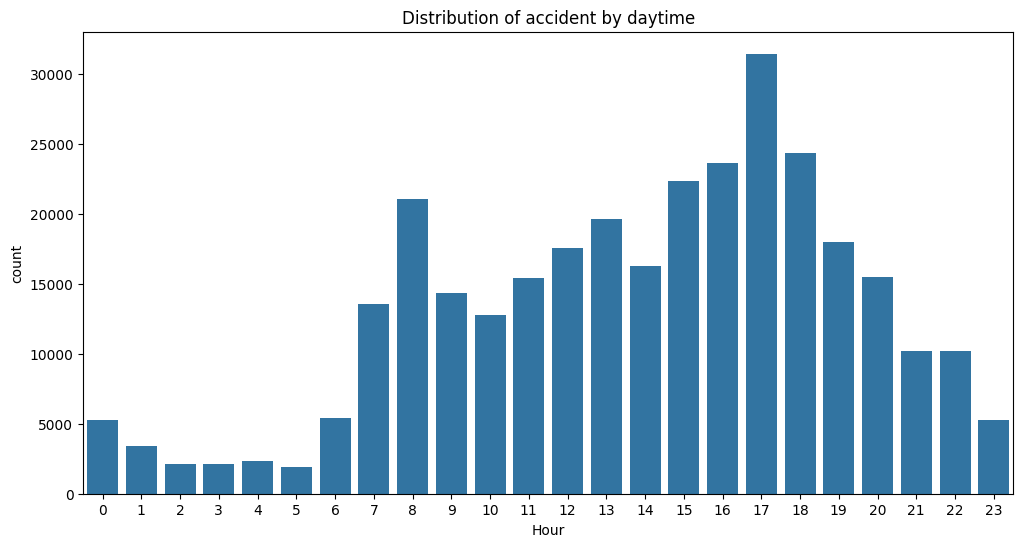

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour')
plt.title('Distribution of accident by daytime')
plt.show()

C:\Users\asmaa\AppData\Local\Temp\ipykernel_10232\3236600612.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




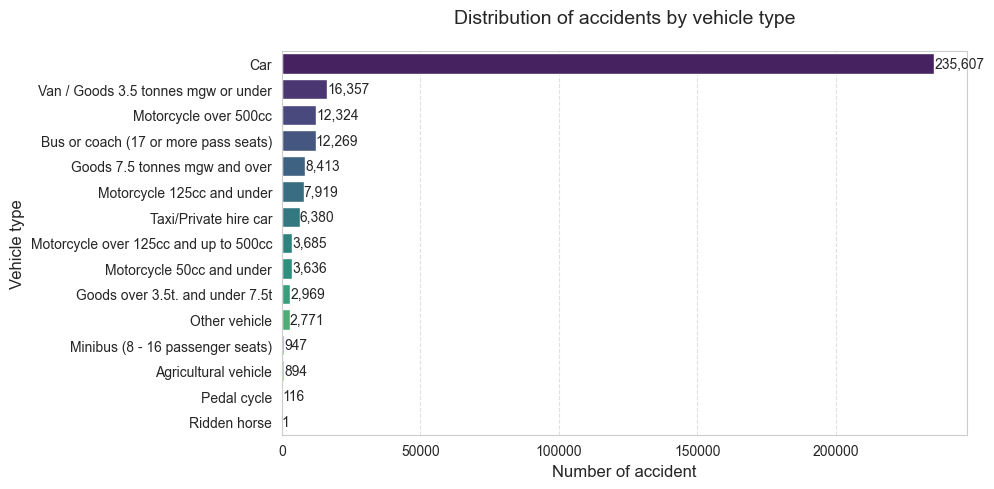

In [225]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Vehicle_Type', order=df['Vehicle_Type'].value_counts().index, 
              palette='viridis')
plt.title('Distribution of accidents by vehicle type', fontsize=14, pad=20)
plt.xlabel('Number of accident', fontsize=12)
plt.ylabel('Vehicle type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{int(width):,}',
                      (width + 0.5, p.get_y() + p.get_height()/2.),
                      ha='left', va='center',
                      fontsize=10)
plt.tight_layout()
plt.show()

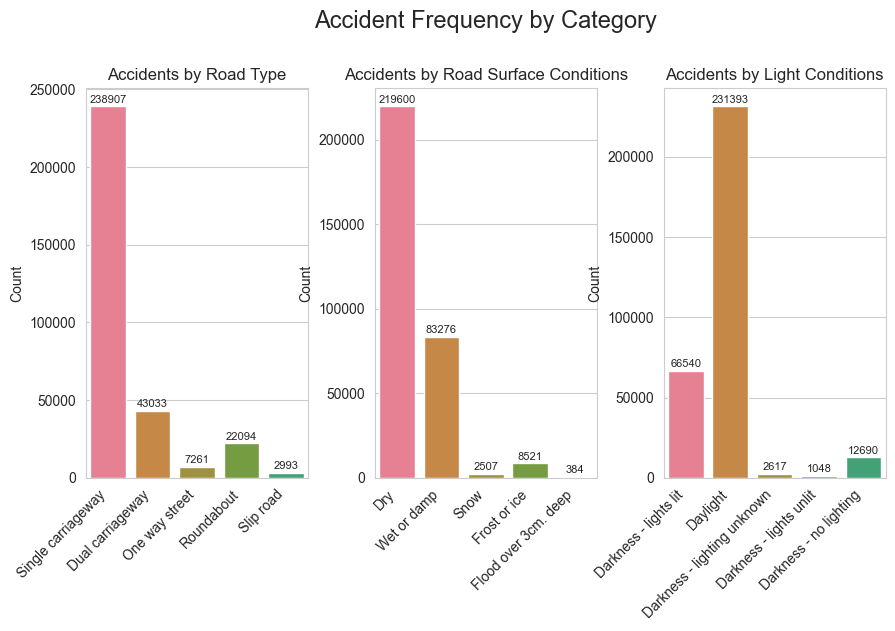

In [221]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.suptitle("Accident Frequency by Category", fontsize=17)
custom_palette = sns.color_palette("husl", 10) 

def subplot(df, i, column, order=None):
    plt.subplot(1, 3, i-2)
    if order:
        ax = sns.countplot(
            data=df, 
            x=column, 
            hue=column,
            order=order,
            palette=custom_palette[:len(order)],
            legend=False
        )
    else:
        ax = sns.countplot(
            data=df, 
            x=column, 
            hue=column,
            palette=custom_palette[:df[column].nunique()],
            legend=False
        )
    plt.title(f"Accidents by {column.replace('_', ' ')}", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=8)
        
road_order = ['Single carriageway', 'Dual carriageway', 'One way street', 'Roundabout', 'Slip road']
subplot(df, i=3, column='Road_Type', order=road_order)

surface_order = ['Dry','Wet or damp','Snow','Frost or ice','Flood over 3cm. deep']
subplot(df, i=4, column='Road_Surface_Conditions', order=surface_order)

light_order = ["Darkness - lights lit", "Daylight", "Darkness - lighting unknown", 
               "Darkness - lights unlit", "Darkness - no lighting"]
subplot(df, i=5, column='Light_Conditions', order=light_order)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.85, wspace=0.3, hspace=0.4)
plt.show()

In [168]:
def fatality_df(column, df=df, sort=False):
    df_hello = df.groupby(['Accident_Severity', column]).size().reset_index(name='count')
    
    df_hello['sum'] = df_hello.groupby(column)['count'].transform('sum')
    df_hello['ratio'] = df_hello['count'] / df_hello['sum']
    df_final = df_hello[df_hello['Accident_Severity'] == 'Fatal']

    if sort:
        df_final = df_final.sort_values(by='ratio')
    return df_final

fatal_collisiontype_df = fatality_df('Driving_experience', sort=True)
fatal_collisiontype_df

,Accident_Severity,Driving_experience,count,sum,ratio
4,Fatal,Below 1yr,301,36977,0.008140
2,Fatal,5-10yr,796,92492,0.008606
3,Fatal,Above 10yr,540,61656,0.008758
6,Fatal,unknown,8,894,0.008949
5,Fatal,No Licence,29,3236,0.008962
0,Fatal,1-2yr,434,47988,0.009044
1,Fatal,2-5yr,645,71045,0.009079


In [169]:
def fatality_df(column, df=df, sort=False):
    df_hello = df.groupby(['Accident_Severity', column])['Accident Date'].count().reset_index()

    sum_dict = df_hello.groupby(column)['Accident Date'].sum().to_dict()
    df_hello['sum'] = df_hello[column].map(sum_dict)
    
    df_hello['ratio'] = df_hello['Accident Date'] / df_hello['sum']
    df_final = df_hello.loc[df_hello['Accident_Severity'] == 'Fatal']
    
    if sort:
        df_final = df_final.sort_values(by='ratio')
    return df_final

fatal_collisiontype_df = fatality_df('Vehicle_Type', sort=True)
fatal_collisiontype_df

,Accident_Severity,Vehicle_Type,Accident Date,sum,ratio
5,Fatal,Minibus (8 - 16 passenger seats),5,947,0.005280
4,Fatal,Goods over 3.5t. and under 7.5t,16,2969,0.005389
0,Fatal,Agricultural vehicle,5,894,0.005593
1,Fatal,Bus or coach (17 or more pass seats),92,12269,0.007499
7,Fatal,Motorcycle 50cc and under,30,3636,0.008251
10,Fatal,Other vehicle,23,2771,0.008300
12,Fatal,Taxi/Private hire car,53,6380,0.008307
3,Fatal,Goods 7.5 tonnes mgw and over,72,8413,0.008558
11,Fatal,Pedal cycle,1,116,0.008621
8,Fatal,Motorcycle over 125cc and up to 500cc,32,3685,0.008684


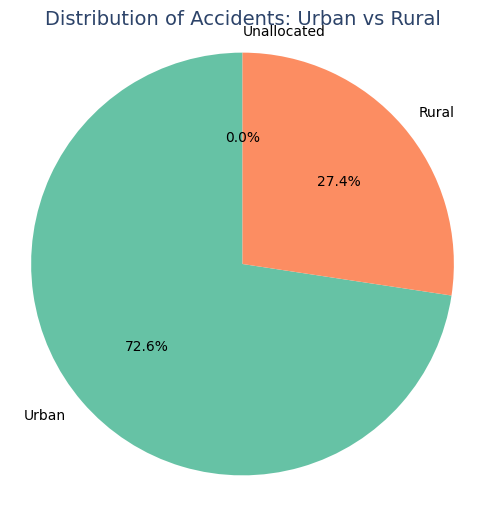

In [173]:
area_counts = df['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Accidents: Urban vs Rural', fontsize=14, color='#2c4369')
plt.axis('equal')  
plt.show()

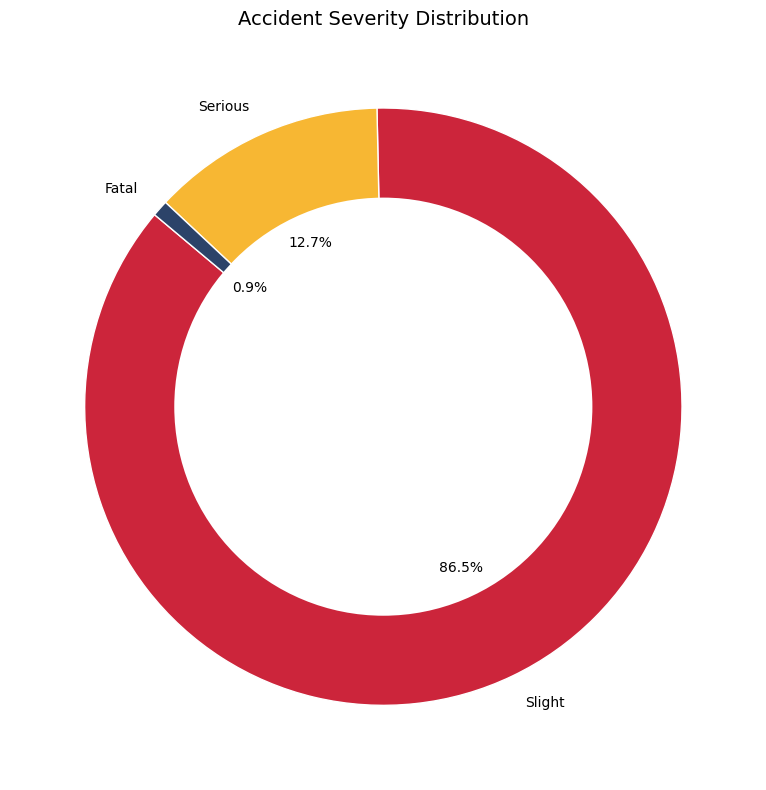

In [175]:
severity_counts = df['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#cc253b', '#f7b733', '#2c4369'] 

plt.pie(severity_counts, labels=severity_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Accident Severity Distribution', fontsize=14)
plt.tight_layout()
plt.show()

In [176]:
from IPython.display import display

df = df.copy()
severity_map = {"Slight": 1, "Serious": 2, "Fatal": 3}
df['Severity_Encoded'] = df['Accident_Severity'].map(severity_map)

_data = {
    "Severity Average": [
        df['Severity_Encoded'].mean(),
        df['Severity_Encoded'].mode()[0],
        df['Severity_Encoded'].median()
    ]
}

_df = pd.DataFrame(_data, index=["Mean", "Mode", "Median"])
display(_df.style.set_properties(**{'width': '500px', 'text-align': 'center'})
              .set_table_styles([{'selector': 'th', 'props': [('background-color', '#222'), ('color', '#fff')]}]))

,Severity Average
Mean,1.144243
Mode,1.000000
Median,1.000000


In [179]:
print(df.columns.tolist())

['Index', 'Accident_Severity', 'Time', 'Day_of_week', 'Accident Date', 'Latitude', 'Light_Conditions', 'District Area', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Types_of_Junction', 'Urban_or_Rural_Area', 'Type_of_collision', 'Weather_Conditions', 'Vehicle_Type', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Pedestrian_movement', 'Owner_of_vehicle', 'Cause_of_accident', 'Year', 'Month', 'Day', 'Hour', 'Time_of_day', 'Severity_Encoded']


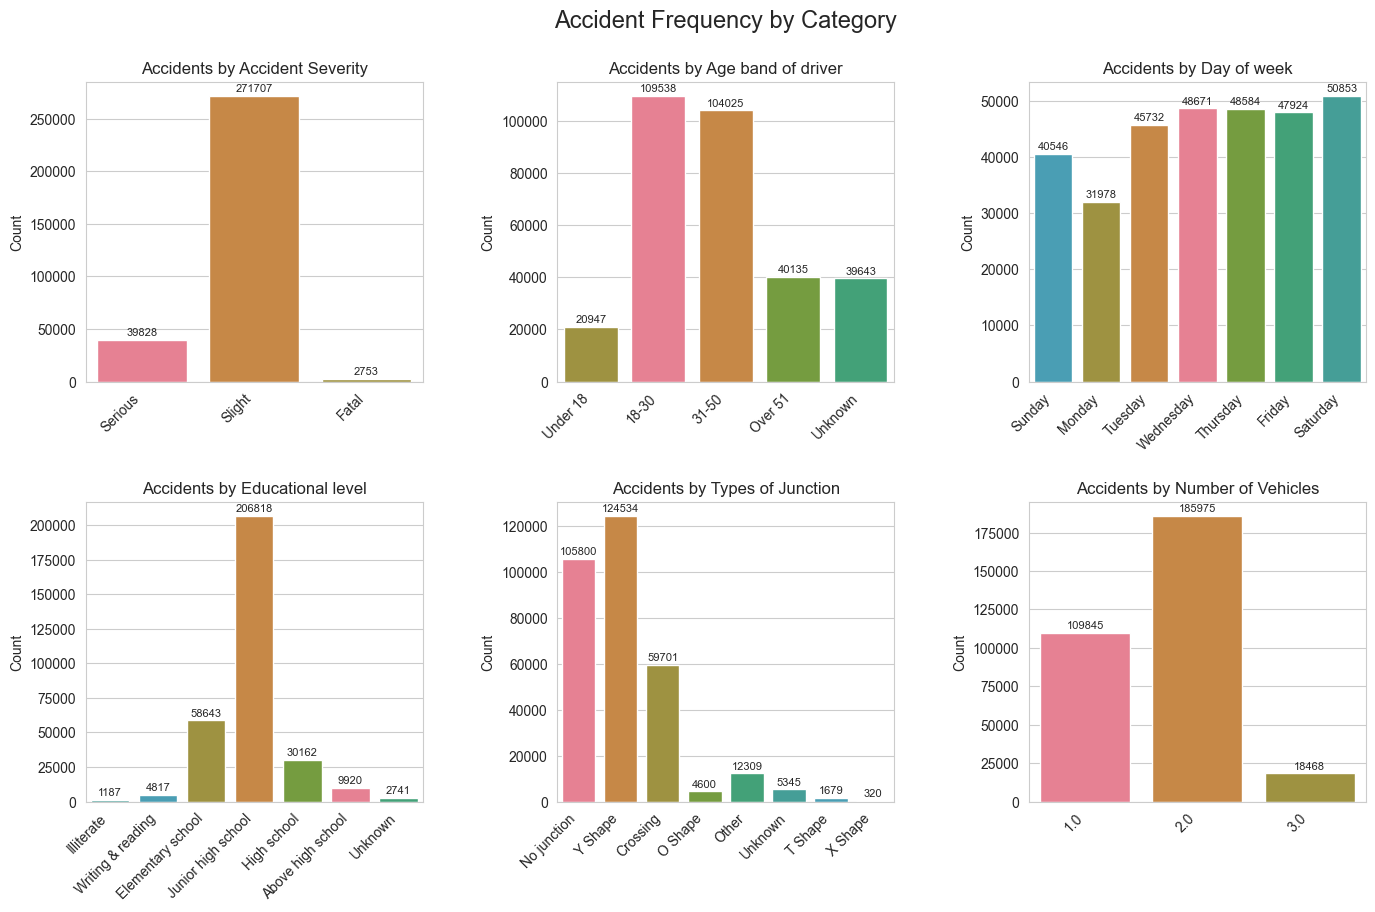

In [182]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
plt.suptitle("Accident Frequency by Category", fontsize=17)
custom_palette = sns.color_palette("husl", 10) 

def subplot(df, i, column, order=None):
    plt.subplot(2, 3, i)
    if order:
        ax = sns.countplot(
            data=df, 
            x=column, 
            hue=column,
            order=order,
            palette=custom_palette[:len(order)],
            legend=False
        )
    else:
        ax = sns.countplot(
            data=df, 
            x=column, 
            hue=column,
            palette=custom_palette[:df[column].nunique()],
            legend=False
        )
    plt.title(f"Accidents by {column.replace('_', ' ')}", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=8)

subplot(df, i=1, column='Accident_Severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(df, i=2, column='Age_band_of_driver', order=age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(df, i=3, column='Day_of_week', order=day_order)

education_order = ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]
subplot(df, i=4, column='Educational_level', order=education_order)

subplot(df, i=5, column='Types_of_Junction')
subplot(df, i=6, column='Number_of_Vehicles')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [183]:
ff = pd.crosstab(index=df['Sex_of_driver'].loc[df['Sex_of_driver'] !="Unknown"], 
                 columns=df['Accident_Severity'],
                 margins=True)
pd.crosstab(index=df['Sex_of_driver'].loc[df['Sex_of_driver'] !="Unknown"],
            columns=df['Accident_Severity'],
            margins=True)
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)))
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)))
ff

P(Gender = Female | Severity = Fatal) = 0.8630992196209587
P(Gender = Male | Severity = Fatal) = 0.8646743079644076


Accident_Severity,Fatal,Serious,Slight,All
Sex_of_driver,,,,
Female,146,2310,15484,17940
Male,2566,36915,252267,291748
All,2712,39225,267751,309688


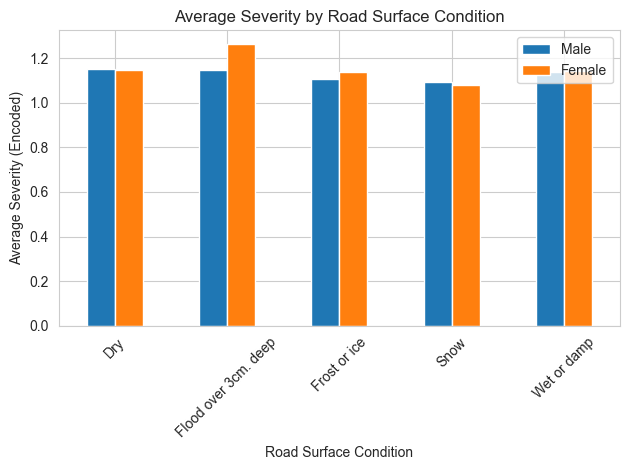

In [184]:
dataMF = {
    "Male": df[df["Sex_of_driver"] == "Male"].groupby('Road_Surface_Conditions')['Severity_Encoded'].mean(),
    "Female": df[df["Sex_of_driver"] == "Female"].groupby('Road_Surface_Conditions')['Severity_Encoded'].mean()
}

plotdata = pd.DataFrame(dataMF)
plotdata.plot(kind="bar")
plt.title("Average Severity by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Average Severity (Encoded)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [185]:
def crossdf(col):
    crossdf = pd.crosstab(df['Accident_Severity'], df[col], normalize='index')
    crossdf = crossdf.reset_index()
    return crossdf

df1 = crossdf('Sex_of_driver')
df1

Sex_of_driver,Accident_Severity,Female,Male,Unknown
0,Fatal,0.053033,0.932074,0.014893
1,Serious,0.057999,0.926861,0.015140
2,Slight,0.056988,0.928452,0.014560


<Axes: title={'center': 'Monthly accident trend'}, xlabel='Month'>

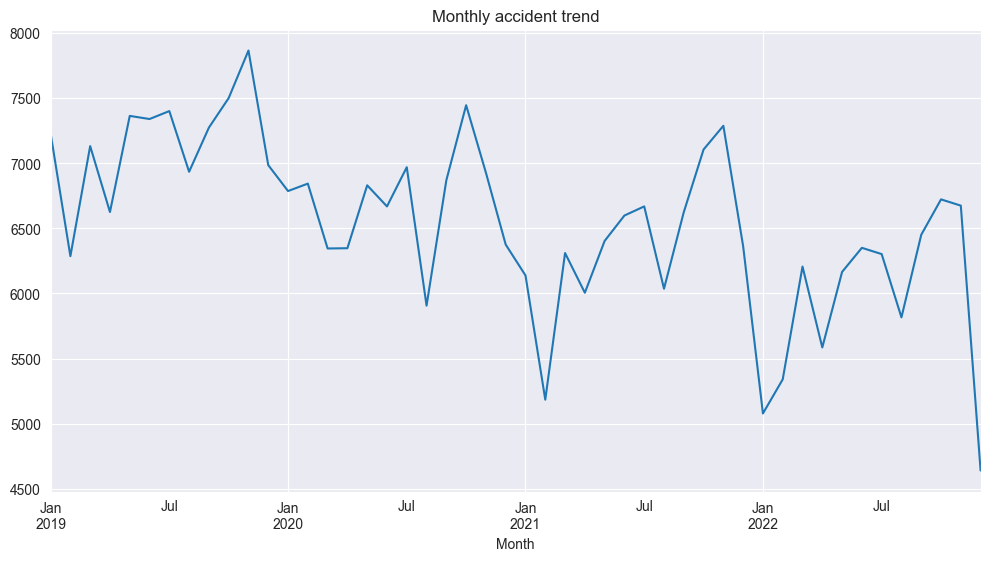

In [201]:
# تحليل اتجاه الحوادث عبر الزمن
df['Month'] = df['Accident Date'].dt.to_period('M')
monthly_trend = df.groupby('Month').size()
monthly_trend.plot(figsize=(12,6), title='Monthly accident trend')